# __Nearest Neighbour(NN) Search and Classification Using Brute-Force Method__

## __Learning Objective__
* Explain classification using 1-NN search and brute-force method.

## __Introduction__

In the previous chapter of `Nearest Neighbour(NN) search`, I've Implemented nearest post office search using `Brute force method.`


In this programming material, I will extend the idea of Brute-force algorithms for the Nearest neighbor search. I will use this algorithm in classification problems with practical coding implementations.

Let's start with the necessary import.

In [1]:
import numpy as np
import random
import operator

## __Dataset Description__

To show you the use case of the brute force algorithm, I will use the sklearn [make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) module and generate synthetic data.

In [2]:
from sklearn.datasets import make_blobs

In [4]:
random.seed(1)
X1, Y1 = make_blobs(n_features=2, centers=3,random_state = 1,n_samples =200, cluster_std= 2)

The data set contains two features and three classes, namely zero, one, and two. A random state is used to reproduce the results. The dataset contains a total of 100 samples.


Let's plot the data.


## __Plot Dataset Graph__

To plot data points on graphs, I will use a seaborn scatterplot. Zero one and two represent three different classes.

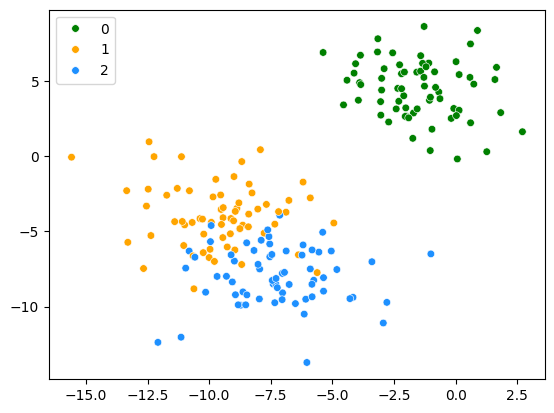

In [5]:
import seaborn as sns
ax = sns.scatterplot(x=X1[:,0], y= X1[:,1], hue=Y1 , s=30, palette=['green','orange','dodgerblue'], legend='full')

In the avobe figure green color represents class zero, orange color represents class one and dodgerblue color represents class two. Altogether there are three classes.

## __Create a Test Point__

You can use skleran [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and find $\text{1-NN}$ of multiple values. In our case it will be complex. For simplicity I will consider one point.

In [6]:
q = np.array([-0.77, 5.5])

I will use `[-0.77,5.5]` as a query point. Visually you can see it belongs to class zero. Let’s calculate the distance and check this fact.

## __Define Distance Function__

Let's define a function that calculates the distance between your query point and the given data. I will use the euclidean distance function as a metric.



In [ ]:
def find_distance(query, data):
    dist=list()
    for index in range(len(data)):
        dist.append(np.sqrt(np.sum((query - data[index])**2)) )
    return dist

The function `find_distance(q, data)` calculates the distance between the query point and the whole dataset and stores it in a list. This function returns the distance between the query and data.

Call the `find_distance()` function to calculate the distance between query $q$ and your data points.

## __Calculate Distance__

Calculate list of distances using find_distance method.

In [ ]:
dist = find_distance(q,X1)
dist[:5]

[17.346147496036416,
 15.83337307077492,
 13.9123774588038,
 11.924975479004527,
 12.796684329689311]

The enumerate() method adds a counter to list values and returns it in the“enumerate” object. I will use these counter values to find candidate output class.

In [ ]:
dist = enumerate(dist)

## __Sort Distance in Ascending Order__

Sort distance obtained in ascending order to get all those points that are nearest to given test point in ascending order. It will later help in making voting system.

In [ ]:
sorted_data = sorted(dist, key=lambda x:x[1])

In [ ]:
sorted_data[:5]

[(128, 0.12485448854556064),
 (158, 0.5843445913095896),
 (153, 0.6080293992576578),
 (101, 0.6643544863472753),
 (6, 0.7479236445215508)]

The data in 72 index is the first Nearest neighbor of query point [-0.77,5.5].  Similarly, data in 80,46 and 97 indexes are the second, third, and fourth nearest neighbor of a query point.


## __Define Nearest Neighbour Value__

The value of $k$ defines how many Nearest Neighbour you want to choose. I will just use 1 for now. However you can change this value and play with the code and visualize the output.

In [ ]:
k = 1

## __Isolate Nearest Neighbor Index__


Up to now, I’ve calculated the distance between all points and my query point. Additionally, I want one nearest neighbor. I need to isolate the candidate nearest neighbor from the calculated distance. Let's do it.

In [ ]:
data_index = list(next(zip(*sorted_data)))[:k]

In [ ]:

data_index

[128]

Data in the 73rd index of $Y1$ is the required output class. If you want k nearest neighbor, you should capture multiple values from `data_index.`

## __Find Candidate Output Class__



Now I need a class at the 73rd index of Y1. Numpy “take” function is used to find value in the given array using the list of the index. I want the 73rd index in Y1.

In [ ]:
output_class_candidate = np.take(Y1, data_index)
output_class_candidate

array([0])

The output is zero; therefore the query point belongs to class zero.

## __Vote Candidates Output Class and Choose Maximum Voted Class__

If you changed the value of k >1, you need to vote for the candidate output class. In numpy, you can do it using the “np.bincount” function. The `argmax()`  function returns the max occurring class as an output.


In [ ]:
output_after_voting = np.bincount(output_class_candidate).argmax()
output_after_voting

0

As expected, the top voted class is 0.

## __Display Results__

Let's plot the graph to display the result.

In [ ]:
X1[data_index][0][1]

5.593646915317295

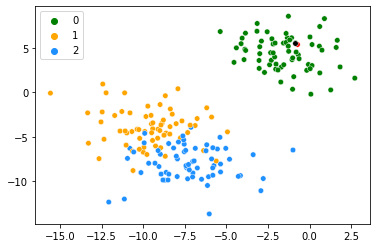

In [ ]:
sns.scatterplot(x= X1[:,0], y= X1[:,1], hue=Y1 , s=30, palette=['green','orange','dodgerblue'], legend='full')
sns.scatterplot(x = [q[0]], y = [q[1]], color='red', marker='o',s=30,legend='full')
sns.scatterplot(x = [X1[data_index][0][0]], y = [X1[data_index][0][1]], color='black', marker='o',s=30,legend='full')

The red dot represents the query point. It lies in the crowd of green color dots. Therefore output class must be zero. My prediction is correct.


## Conclusion

In this programming exercise, I extended the idea of Brute-force algorithms for the Nearest neighbor search. I successfully used this algorithm in classification problems with practical coding implementations. This is the most straightforward approach. You can split data into a train set and test set and apply similar logic to find the nearest neighbor of multiple points at once. It is implemented in the next chapter K Nearest neighbors.
Congratulations, you have successfully implemented 1−NN using the brute-force method.